In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('result.csv')
df.head()


,trial,target,delay,time,scrollCount_totalScrollCount,scrollCount_upScrollCount,scrollCount_downScrollCount,scrollCount_reverseScrollCount,participants
0,1,DIV 5,0,3.956,52,21,31,21,1
1,2,DIV 1,50,3.108,31,31,0,0,1
2,3,DIV 1,250,3.238,20,20,0,0,1
3,4,DIV 7,100,4.537,66,0,66,0,1
4,5,DIV 2,200,3.081,35,35,0,0,1


In [3]:
# convert time unit from seconds to milliseconds
df['time'] = df['time'] * 1000

df

,trial,target,delay,time,scrollCount_totalScrollCount,scrollCount_upScrollCount,scrollCount_downScrollCount,scrollCount_reverseScrollCount,participants
0,1,DIV 5,0,3956.0,52,21,31,21,1
1,2,DIV 1,50,3108.0,31,31,0,0,1
2,3,DIV 1,250,3238.0,20,20,0,0,1
3,4,DIV 7,100,4537.0,66,0,66,0,1
4,5,DIV 2,200,3081.0,35,35,0,0,1
...,...,...,...,...,...,...,...,...,...
643,104,DIV 2,0,3241.0,15,15,0,0,6
644,105,DIV 3,200,3419.0,14,14,0,0,6
645,106,DIV 7,50,3928.0,20,0,20,0,6
646,107,DIV 2,150,2975.0,20,20,0,0,6


In [5]:
# make 'group' column
# if target = 'DIV 1' or 'DIV 7' then group = 'far'
# if target = 'DIV 2' or 'DIV 6' then group = 'medium'
# if target = 'DIV 3' or 'DIV 5' then group = 'close'

df['group'] = df['target'].apply(lambda x: 'far' if x in ['DIV 1', 'DIV 7'] else ('medium' if x in ['DIV 2', 'DIV 6'] else 'close'))

df

,trial,target,delay,time,scrollCount_totalScrollCount,scrollCount_upScrollCount,scrollCount_downScrollCount,scrollCount_reverseScrollCount,participants,group
0,1,DIV 5,0,3956.0,52,21,31,21,1,close
1,2,DIV 1,50,3108.0,31,31,0,0,1,far
2,3,DIV 1,250,3238.0,20,20,0,0,1,far
3,4,DIV 7,100,4537.0,66,0,66,0,1,far
4,5,DIV 2,200,3081.0,35,35,0,0,1,medium
...,...,...,...,...,...,...,...,...,...,...
643,104,DIV 2,0,3241.0,15,15,0,0,6,medium
644,105,DIV 3,200,3419.0,14,14,0,0,6,close
645,106,DIV 7,50,3928.0,20,0,20,0,6,far
646,107,DIV 2,150,2975.0,20,20,0,0,6,medium


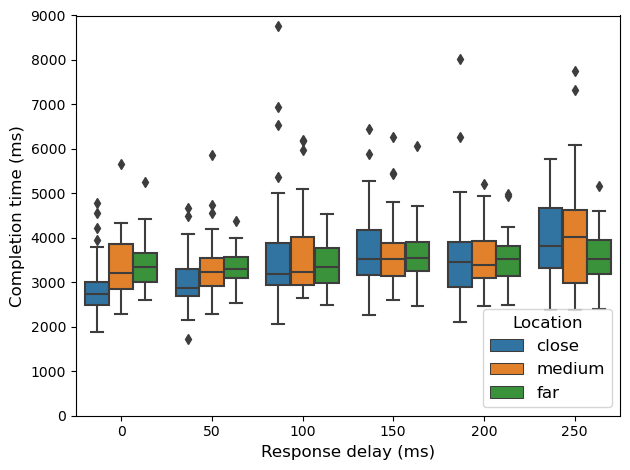

In [27]:
sns.boxplot(x='delay', y='time', hue='group', data=df, hue_order=['close', 'medium', 'far'])

plt.legend(title='Location', title_fontsize='12', fontsize='12', loc='lower right')
plt.xlabel('Response delay (ms)', fontsize=12)
plt.ylabel('Completion time (ms)', fontsize=12)
plt.ylim(0, 9000)
plt.tight_layout()

plt.savefig('scroll_time.pdf')

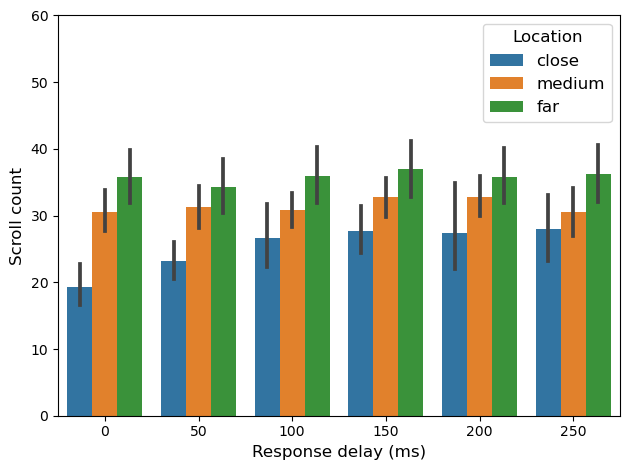

In [33]:
sns.barplot(x='delay', y='scrollCount_totalScrollCount', hue='group', data=df, hue_order=['close', 'medium', 'far'])
plt.legend(title='Location', title_fontsize='12', fontsize='12', loc='upper right')
plt.xlabel('Response delay (ms)', fontsize=12)
plt.ylabel('Scroll count', fontsize=12)
plt.ylim(0, 60)
plt.tight_layout()

plt.savefig('scroll_count.pdf')


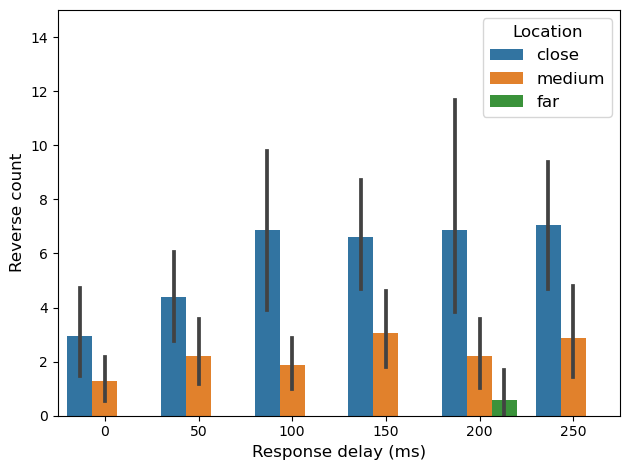

In [35]:
sns.barplot(x='delay', y='scrollCount_reverseScrollCount', hue='group', data=df, hue_order=['close', 'medium', 'far'])
plt.legend(title='Location', title_fontsize='12', fontsize='12', loc='upper right')
plt.xlabel('Response delay (ms)', fontsize=12)
plt.ylabel('Reverse count', fontsize=12)
plt.ylim(0, 15)
plt.tight_layout()

plt.savefig('scroll_reverse.pdf')


In [13]:
grouped = df.groupby(['participants', 'delay', 'group'])['time'].mean().reset_index()

# Convert the distance-based precision data to wide format
wide_format_time = grouped.pivot(index='participants', columns=['delay', 'group'], values='time')

# Flatten the multi-level column index
wide_format_time.columns = [f"{delay}_{group}" for delay, group in wide_format_time.columns]
wide_format_time.reset_index(inplace=True)

# Save the result as a CSV file
wide_format_time.to_csv('wide_format_time.csv', index=False)

In [14]:
grouped = df.groupby(['participants', 'delay', 'group'])['scrollCount_totalScrollCount'].mean().reset_index()

# Convert the distance-based precision data to wide format
wide_format_scrollcount = grouped.pivot(index='participants', columns=['delay', 'group'], values='scrollCount_totalScrollCount')

# Flatten the multi-level column index
wide_format_scrollcount.columns = [f"{delay}_{group}" for delay, group in wide_format_scrollcount.columns]
wide_format_scrollcount.reset_index(inplace=True)

# Save the result as a CSV file
wide_format_scrollcount.to_csv('wide_format_scrollcount.csv', index=False)

In [16]:
grouped = df.groupby(['participants', 'delay', 'group'])['scrollCount_reverseScrollCount'].mean().reset_index()

# Convert the distance-based precision data to wide format
wide_format_scrollreverse = grouped.pivot(index='participants', columns=['delay', 'group'], values='scrollCount_reverseScrollCount')

# Flatten the multi-level column index
wide_format_scrollreverse.columns = [f"{delay}_{group}" for delay, group in wide_format_scrollreverse.columns]
wide_format_scrollreverse.reset_index(inplace=True)

# Save the result as a CSV file
wide_format_scrollreverse.to_csv('wide_format_scrollreverse.csv', index=False)